## 강남 3구의 체감 안전도가 높을까?

In [2]:
import pandas as pd
import numpy as np

In [3]:
#서울시 관서별 5대 범죄 발생 검거 현황

vc_arrest_rates = pd.read_csv('./data/02. crime_in_Seoul.csv', thousands = ',', encoding = 'euc-kr')

In [4]:
vc_arrest_rates.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,1395,477,1355,1170
1,종로서,3,3,6,5,115,98,1070,413,1278,1070
2,남대문서,1,0,6,4,65,46,1153,382,869,794
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711
4,혜화서,3,2,5,4,96,63,1114,424,1015,861


In [5]:
vc_arrest_rates.describe()

,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,5.258065,4.935484,8.903226,8.161290,175.774194,131.967742,1784.096774,694.645161,2103.419355,1779.419355
std,3.605253,3.203493,4.935280,5.710206,85.580259,56.590037,699.948825,276.919429,829.042330,681.461164
min,1.000000,0.000000,1.000000,1.000000,59.000000,46.000000,653.000000,186.000000,547.000000,491.000000
25%,3.000000,2.500000,6.000000,4.000000,103.500000,90.000000,1133.500000,450.500000,1408.000000,1219.000000
50%,4.000000,4.000000,8.000000,7.000000,154.000000,124.000000,1812.000000,672.000000,2054.000000,1711.000000
75%,7.500000,7.500000,13.000000,11.500000,251.000000,175.500000,2264.000000,858.500000,2717.500000,2338.500000
max,14.000000,12.000000,22.000000,26.000000,334.000000,247.000000,3239.000000,1277.000000,3572.000000,2961.000000


In [6]:
vc_arrest_rates.shape

(31, 11)

In [7]:
vc_arrest_rates.isnull().sum()

관서명      0
살인 발생    0
살인 검거    0
강도 발생    0
강도 검거    0
강간 발생    0
강간 검거    0
절도 발생    0
절도 검거    0
폭력 발생    0
폭력 검거    0
dtype: int64

----

## Initial a googlemaps module

In [8]:
import googlemaps

gmaps_key = "ma key"<br/>
gmaps = googlemaps.Client(key = gmaps_key)

In [11]:
#규봉: gmaps.geocode에 '검색명'을 넣으면 
#시각화에 필요한 주소, 위도 및 경도 등 다양한 정보가 list 내 dict 형태로 수집 후 출력됨
gmaps.geocode('서울중부경찰서', language = 'ko')

[{'address_components': [{'long_name': '２７',
    'short_name': '２７',
    'types': ['premise']},
   {'long_name': '수표로',
    'short_name': '수표로',
    'types': ['political', 'sublocality', 'sublocality_level_4']},
   {'long_name': '을지로동',
    'short_name': '을지로동',
    'types': ['political', 'sublocality', 'sublocality_level_2']},
   {'long_name': '중구',
    'short_name': '중구',
    'types': ['political', 'sublocality', 'sublocality_level_1']},
   {'long_name': '서울특별시',
    'short_name': '서울특별시',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': '대한민국',
    'short_name': 'KR',
    'types': ['country', 'political']},
   {'long_name': '100-032',
    'short_name': '100-032',
    'types': ['postal_code']}],
  'formatted_address': '대한민국 서울특별시 중구 을지로동 수표로 27',
  'geometry': {'location': {'lat': 37.5636465, 'lng': 126.9895796},
   'location_type': 'ROOFTOP',
   'viewport': {'northeast': {'lat': 37.56499548029149,
     'lng': 126.9909285802915},
    'southwest': {'lat': 3

 - 'formatted_address': '대한민국 서울특별시 중구 을지로동 수표로 27' <br/>
 - 'geometry': {'location': {'lat': 37.5636465, 'lng': 126.9895796}

In [23]:
test = gmaps.geocode('서울중부경찰서', language = 'ko')

In [26]:
type(test)

list

In [29]:
len(test)

1

In [30]:
type(test[0])

dict

In [31]:
len(test[0])

5

_규봉: 리스트 안에 길이 5의 딕셔너리 형태로 정보가 저장됨. **위도 및 경도같은 세부 정보는 dict 안의 dict 내 value로 담겼음을 유념**_

In [13]:
vc_arrest_rates.columns

Index(['관서명', '살인 발생', '살인 검거', '강도 발생', '강도 검거', '강간 발생', '강간 검거', '절도 발생',
       '절도 검거', '폭력 발생', '폭력 검거'],
      dtype='object')

In [16]:
for name in vc_arrest_rates['관서명']:
    print(name)

중부서
종로서
남대문서
서대문서
혜화서
용산서
성북서
동대문서
마포서
영등포서
성동서
동작서
광진서
서부서
강북서
금천서
중랑서
강남서
관악서
강서서
강동서
종암서
구로서
서초서
양천서
송파서
노원서
방배서
은평서
도봉서
수서서


In [19]:
#위의 결과물에서 '서'를 제외한 후 순수 지역 이름 모은 후 '서울XX경찰서' 리스트 확보
station_name = []

for name in vc_arrest_rates['관서명']:
    station_name.append('서울' + str(name[:-1] + '경찰서'))

In [22]:
station_name[:5]

['서울중부경찰서', '서울종로경찰서', '서울남대문경찰서', '서울서대문경찰서', '서울혜화경찰서']

In [43]:
#수집된 'station_name' 리스트를 for loop 안에 넣어
#각 경찰서의 주소, 위도 및 경도 수집


from tqdm import tqdm_notebook

station_address = []
station_lat = []
station_lng = []

for name in tqdm_notebook(station_name):
    tmp = gmaps.geocode(name, language = 'ko')
    station_address.append(tmp[0].get('formatted_address')) #리스트 내 딕셔너리를 dict.get fn 활용해 접근
    print(station_address)
    
    tmp_loc = tmp[0].get('geometry') #dict 안 dict의 위도 및 경도 value에 접근
    
    station_lat.append(tmp_loc['location']['lat']) #.loc['x']['y']
    station_lng.append(tmp_loc['location']['lng'])
    
    print(name + '-->' + tmp[0].get('formatted_address'))

['대한민국 서울특별시 중구 을지로동 수표로 27']
서울중부경찰서-->대한민국 서울특별시 중구 을지로동 수표로 27
['대한민국 서울특별시 중구 을지로동 수표로 27', '대한민국 서울특별시 종로구 종로1.2.3.4가동 율곡로 46']
서울종로경찰서-->대한민국 서울특별시 종로구 종로1.2.3.4가동 율곡로 46
['대한민국 서울특별시 중구 을지로동 수표로 27', '대한민국 서울특별시 종로구 종로1.2.3.4가동 율곡로 46', '대한민국 서울특별시 중구 남대문로5가 한강대로 410']
서울남대문경찰서-->대한민국 서울특별시 중구 남대문로5가 한강대로 410
['대한민국 서울특별시 중구 을지로동 수표로 27', '대한민국 서울특별시 종로구 종로1.2.3.4가동 율곡로 46', '대한민국 서울특별시 중구 남대문로5가 한강대로 410', '대한민국 서울특별시 서대문구 미근동 통일로 113']
서울서대문경찰서-->대한민국 서울특별시 서대문구 미근동 통일로 113
['대한민국 서울특별시 중구 을지로동 수표로 27', '대한민국 서울특별시 종로구 종로1.2.3.4가동 율곡로 46', '대한민국 서울특별시 중구 남대문로5가 한강대로 410', '대한민국 서울특별시 서대문구 미근동 통일로 113', '대한민국 서울특별시 종로구 종로1.2.3.4가동 창경궁로 112-16']
서울혜화경찰서-->대한민국 서울특별시 종로구 종로1.2.3.4가동 창경궁로 112-16
['대한민국 서울특별시 중구 을지로동 수표로 27', '대한민국 서울특별시 종로구 종로1.2.3.4가동 율곡로 46', '대한민국 서울특별시 중구 남대문로5가 한강대로 410', '대한민국 서울특별시 서대문구 미근동 통일로 113', '대한민국 서울특별시 종로구 종로1.2.3.4가동 창경궁로 112-16', '대한민국 서울특별시 용산구 원효로1가 12-12']
서울용산경찰서-->대한민국 서울특별시 용산구 원효로1가 12-12
['대한민국 서울특별시 중구 을지로동 수표로 27', '대한민국 서울특별시 종로구 종로1.

['대한민국 서울특별시 중구 을지로동 수표로 27', '대한민국 서울특별시 종로구 종로1.2.3.4가동 율곡로 46', '대한민국 서울특별시 중구 남대문로5가 한강대로 410', '대한민국 서울특별시 서대문구 미근동 통일로 113', '대한민국 서울특별시 종로구 종로1.2.3.4가동 창경궁로 112-16', '대한민국 서울특별시 용산구 원효로1가 12-12', '대한민국 서울특별시 성북구 삼선동5가 301', '대한민국 서울특별시 동대문구 청량리동 약령시로21길 29', '대한민국 서울특별시 마포구 아현동 618-1', '대한민국 서울특별시 영등포구 당산1동 국회대로 608', '대한민국 서울특별시 성동구 행당1동 왕십리광장로 9', '대한민국 서울특별시 동작구 노량진동 72', '대한민국 서울특별시 광진구 구의1동 자양로 167', '대한민국 서울특별시 은평구 대조동 통일로 757', '대한민국 서울특별시 강북구 번1동 오패산로 406', '대한민국 서울특별시 관악구 신림동 544', '대한민국 서울특별시 중랑구 신내1동 신내역로3길 40-10', '대한민국 서울특별시 강남구 대치동 998', '대한민국 서울특별시 관악구 봉천동', '대한민국 서울특별시 양천구 신월동 화곡로 73', '대한민국 서울특별시 강동구 성내1동 성내로 57', '대한민국 서울특별시 성북구 종암동 종암로 135', '대한민국 서울특별시 구로구 가마산로 235', '대한민국 서울특별시 서초구 서초3동 반포대로 179', '대한민국 서울특별시 양천구 신정6동 목동동로 99', '대한민국 서울특별시 송파구 가락본동 9']
서울송파경찰서-->대한민국 서울특별시 송파구 가락본동 9
['대한민국 서울특별시 중구 을지로동 수표로 27', '대한민국 서울특별시 종로구 종로1.2.3.4가동 율곡로 46', '대한민국 서울특별시 중구 남대문로5가 한강대로 410', '대한민국 서울특별시 서대문구 미근동 통일로 113', '대한민국 서울특별시 종로구 종로1.2.3.4가동 창경궁로 112-16', '대한민

#### Key로 Value얻기(get)<br/>
    a = {'name':'pey', 'phone':'0119993323', 'birth': '1118'}
    a.get('name')
        'pey'
    a.get('phone')
        '0119993323'
        
- get(x) 함수는 x라는 key에 대응되는 value를 돌려준다. 앞서 살펴보았듯이 a.get('name')은 a['name']을 사용했을 때와 동일한 결과값을 돌려받는다.<br/> 다만, 다음 예제에서 볼 수 있듯이 a['nokey']처럼 존재하지 않는 키(nokey)로 값을 가져오려고 할 경우 a['nokey']는 Key 오류를 발생시키고<br/> a.get('nokey')는 None을 리턴한다는 차이가 있다.

In [44]:
station_address

['대한민국 서울특별시 중구 을지로동 수표로 27',
 '대한민국 서울특별시 종로구 종로1.2.3.4가동 율곡로 46',
 '대한민국 서울특별시 중구 남대문로5가 한강대로 410',
 '대한민국 서울특별시 서대문구 미근동 통일로 113',
 '대한민국 서울특별시 종로구 종로1.2.3.4가동 창경궁로 112-16',
 '대한민국 서울특별시 용산구 원효로1가 12-12',
 '대한민국 서울특별시 성북구 삼선동5가 301',
 '대한민국 서울특별시 동대문구 청량리동 약령시로21길 29',
 '대한민국 서울특별시 마포구 아현동 618-1',
 '대한민국 서울특별시 영등포구 당산1동 국회대로 608',
 '대한민국 서울특별시 성동구 행당1동 왕십리광장로 9',
 '대한민국 서울특별시 동작구 노량진동 72',
 '대한민국 서울특별시 광진구 구의1동 자양로 167',
 '대한민국 서울특별시 은평구 대조동 통일로 757',
 '대한민국 서울특별시 강북구 번1동 오패산로 406',
 '대한민국 서울특별시 관악구 신림동 544',
 '대한민국 서울특별시 중랑구 신내1동 신내역로3길 40-10',
 '대한민국 서울특별시 강남구 대치동 998',
 '대한민국 서울특별시 관악구 봉천동',
 '대한민국 서울특별시 양천구 신월동 화곡로 73',
 '대한민국 서울특별시 강동구 성내1동 성내로 57',
 '대한민국 서울특별시 성북구 종암동 종암로 135',
 '대한민국 서울특별시 구로구 가마산로 235',
 '대한민국 서울특별시 서초구 서초3동 반포대로 179',
 '대한민국 서울특별시 양천구 신정6동 목동동로 99',
 '대한민국 서울특별시 송파구 가락본동 9',
 '대한민국 서울특별시 노원구 하계동 노원로 283',
 '대한민국 서울특별시 서초구 방배동 동작대로 204',
 '대한민국 서울특별시 은평구 불광2동 연서로 365',
 '대한민국 서울특별시 도봉구 창4동 노해로 403',
 '대한민국 서울특별시 강남구 개포동 개포로 617']

In [45]:
station_lat

[37.5636465,
 37.5755578,
 37.5547584,
 37.5647848,
 37.5718401,
 37.5411211,
 37.5897271,
 37.58506149999999,
 37.550814,
 37.5257884,
 37.5617309,
 37.5130685,
 37.542873,
 37.6128611,
 37.63730390000001,
 37.4814051,
 37.618692,
 37.5094352,
 37.4743789,
 37.5397827,
 37.528511,
 37.6020592,
 37.494931,
 37.4956054,
 37.5165667,
 37.5019065,
 37.6423605,
 37.4945959,
 37.6283597,
 37.6533589,
 37.49349]

In [46]:
station_lng

[126.9895796,
 126.9848674,
 126.9734981,
 126.9667762,
 126.9988562,
 126.9676935,
 127.0161318,
 127.0457679,
 126.954028,
 126.901006,
 127.0363806,
 126.9428078,
 127.083821,
 126.9274951,
 127.0273399,
 126.9099508,
 127.1047136,
 127.0669578,
 126.9509748,
 126.8299968,
 127.1268224,
 127.0321577,
 126.886731,
 127.0052504,
 126.8656763,
 127.1271513,
 127.0714027,
 126.9831279,
 126.9287226,
 127.052682,
 127.0772119]

In [54]:
gu_name = []

for name in station_address:
    tmp = name.split() #['대한민국', '서울시', '중구', '을지로동', '수표로', '27']
    tmp_gu = [gu for gu in tmp if gu[-1] == '구'][0] #리스트 내 끝이 '구'로 끝나는 개체만 인정
    
    gu_name.append(tmp_gu)
    
vc_arrest_rates['구별'] = gu_name #규봉: 기존 DataFrame table에 칼럼 추가(리스트로)

In [55]:
vc_arrest_rates.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


In [57]:
#관악구에 위치한 금천서 예외처리
vc_arrest_rates[vc_arrest_rates['관서명'] == '금천서']

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
15,금천서,3,4,6,6,151,122,1567,888,2054,1776,관악구


In [70]:
vc_arrest_rates.loc[3, ['구별']]

구별    서대문구
Name: 3, dtype: object

In [68]:
vc_arrest_rates.iloc[3, -1]

'서대문구'

In [71]:
vc_arrest_rates.loc[vc_arrest_rates['관서명'] == '금천서', '구별'] = '금천구'

In [72]:
vc_arrest_rates[vc_arrest_rates['관서명'] == '금천서']

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
15,금천서,3,4,6,6,151,122,1567,888,2054,1776,금천구


In [74]:
vc_arrest_rates

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구
5,용산서,5,5,14,14,194,173,1557,587,2050,1704,용산구
6,성북서,2,2,2,1,86,71,953,409,1194,1015,성북구
7,동대문서,5,5,13,13,173,146,1981,814,2548,2227,동대문구
8,마포서,8,8,14,10,294,247,2555,813,2983,2519,마포구
9,영등포서,14,12,22,20,295,183,2964,978,3572,2961,영등포구


In [75]:
vc_arrest_rates.to_csv('./data/02. crime_in_Seoul_include_gu_name.csv',
                      sep = ',', encoding = 'utf-8')

In [76]:
vc_arrest_rates_with_gu = vc_arrest_rates.copy()

In [77]:
vc_arrest_rates_with_gu.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


In [78]:
#pivot_table
pivot_vc = pd.pivot_table(vc_arrest_rates_with_gu, index = '구별', aggfunc = np.sum)

In [79]:
pivot_vc.head()

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
구별,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284
강동구,123,156,8,6,3,4,789,2366,2248,2712
강북구,126,153,13,14,8,7,618,1434,2348,2649
관악구,221,320,14,12,8,9,827,2706,2642,3298
광진구,220,240,26,14,4,4,1277,3026,2180,2625


In [80]:
pivot_vc['강간검거율'] = pivot_vc['강간 검거'] / pivot_vc['강간 발생'] * 100
pivot_vc['강도검거율'] = pivot_vc['강도 검거'] / pivot_vc['강도 발생'] * 100
pivot_vc['살인검거율'] = pivot_vc['살인 검거'] / pivot_vc['살인 발생'] * 100
pivot_vc['절도검거율'] = pivot_vc['절도 검거'] / pivot_vc['절도 발생'] * 100
pivot_vc['폭력검거율'] = pivot_vc['폭력 검거'] / pivot_vc['폭력 발생'] * 100

del pivot_vc['강간 검거']
del pivot_vc['강도 검거']
del pivot_vc['살인 검거']
del pivot_vc['절도 검거']
del pivot_vc['폭력 검거']

In [81]:
pivot_vc.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,114.285714,43.096234,88.637222
관악구,320,12,9,2706,3298,69.062500,116.666667,88.888889,30.561715,80.109157
광진구,240,14,4,3026,2625,91.666667,185.714286,100.000000,42.200925,83.047619


In [94]:
np.count_nonzero(pivot_vc.iloc[:, 5:] > 100)
#타년도 사건을 처리하는 경우로 인해 100 이상이 나오기도.

8

In [97]:
pivot_vc.loc[pivot_vc['강도검거율'] >100, '강도검거율']

구별
강동구    133.333333
관악구    116.666667
광진구    185.714286
도봉구    111.111111
Name: 강도검거율, dtype: float64

In [98]:
pivot_vc['강도검거율'] >100

구별
강남구     False
강동구      True
강북구     False
관악구      True
광진구      True
구로구     False
금천구     False
노원구     False
도봉구      True
동대문구    False
동작구     False
마포구     False
서대문구    False
서초구     False
성동구     False
성북구     False
송파구     False
양천구     False
영등포구    False
용산구     False
은평구     False
종로구     False
중구      False
중랑구     False
Name: 강도검거율, dtype: bool

_규봉: 따라서 이어지는 코드에서 .loc를 사용한다._

In [99]:
target = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']

#타겟 column의 value가 100이 넘어가면 100으로
for col in target:
    pivot_vc[pivot_vc[col] > 100, col] = 100 #.loc를 사용 안하면 에러 발생

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [100]:
target = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']

#타겟 column의 value가 100이 넘어가면 100으로
for col in target:
    pivot_vc.loc[pivot_vc[col] > 100, col] = 100 #.loc 사용

In [118]:
pivot_vc.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157
광진구,240,14,4,3026,2625,91.666667,100.000000,100.000000,42.200925,83.047619


In [105]:
np.count_nonzero(pivot_vc.iloc[:, 5:] > 100)

0

In [119]:
pivot_vc.rename(columns = {'강간 발생': '강간',
                         '강도 발생': '강도',
                         '살인 발생': '살인',
                         '절도 발생': '절도',
                         '폭력 발생': '폭력'}, inplace = True)

In [120]:
pivot_vc.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157
광진구,240,14,4,3026,2625,91.666667,100.000000,100.000000,42.200925,83.047619


---

## 정규화(Normalize): 전체 구간을 0 ~ 100 사이에 두기
- 강력 범죄와 절도 범죄의 빈도 차이가 크므로 정규화

In [121]:
pivot_vc.columns

Index(['강간', '강도', '살인', '절도', '폭력', '강간검거율', '강도검거율', '살인검거율', '절도검거율',
       '폭력검거율'],
      dtype='object')

In [124]:
from sklearn import preprocessing

target = ['강간', '강도', '살인', '절도', '폭력']

x = pivot_vc[target].values
min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x.astype(float))
vc_arrest_rates_norm = pd.DataFrame(x_scaled,
                                   columns = target,
                                   index = pivot_vc.index)

In [125]:
target2 = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
vc_arrest_rates_norm[target2] = pivot_vc[target2]

In [126]:
vc_arrest_rates_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619


규봉: 우리가 데이터를 학습할 때, Training과 Test를 나눈다.
만약, 표준화가 필요하다면 나누기 전에 미리 표준화를 하고 데이터를 나눌 것이다. <br/>
그런데, 이미 나눠진 상태에서 표준화를 해야한다면 어떤 일이 발생할까?
MinMax Scaler는 데이터의 범위를 0과 1사이로 만들기 위해 데이터의 최소, 최대값을 구하여 진행한다.<br/>
그런데, Training Data를 표준화하고 Test Data를 가각 표준화하면 각 변수의 Min, Max 값이<br/>
Training과 Test 두 집단에서 다르기 때문에 같은 값이라도 다른 값이 될 우려가 있다.
이 경우, 아래와 같이 코딩하면 된다.<br/>
우리가 얘기하는 MinMax Scaler가 fit_transform이고 다음에 오는 transform 메소드는 위에서 구한 Min, Max 값을 이용해 단순히 변환만 진행한다.  
[[출처] skLearn 데이터 표준화 방법에서 fit_transform과 transform의 차이|작성자 이것저것 연구실](https://blog.naver.com/swkim4610/221295110013)

from sklearn import preprocessing <br/>
import numpy as np<br/>
X_train = np.array([[1.],[2.],[3.],[4.]])<br/>
X_test = np.array([[0.],[2.],[3.],[4.]])<br/>
<br/>
scaler = preprocessing.MinMaxScaler()<br/>
X_train = scaler.fit_transform(X_train)<br/>
X_test = scaler.transform(X_test)<br/>
print(X_train)<br/>
print(X_test)

---

### surveilance-cameras-in-seoul 프로젝트 결과물 import

In [128]:
result_cctv = pd.read_csv('./data/01. CCTV_result.csv', encoding = 'UTF-8',
                         index_col = '구별')

In [129]:
result_cctv.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.170552,465.422892
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.226535,329.342026
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.146413,551.503155
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.284673,162.948104


In [130]:
vc_arrest_rates_norm[['인구수', 'CCTV소계']] = result_cctv[['인구수', '소계']]

In [131]:
vc_arrest_rates_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV소계
구별,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,372164.0,707


In [141]:
##################################################################
tmp = 0
tmp_list = []
for i in range(len(vc_arrest_rates_norm['강간'])):
    for j in range(5):
        tmp += vc_arrest_rates_norm.iloc[i, j]
    tmp_list.append(tmp)
    tmp = 0
vc_arrest_rates_norm['총 범죄'] = tmp_list
#규봉: for loop로 데이터 삽입하려는 사고 버리고 
#효율적인 column간 합의 접근으로 습관들 들이자.
##################################################################

In [139]:
col = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
vc_arrest_rates_norm['총 검거'] = np.sum(vc_arrest_rates_norm[col], axis = 1)

In [142]:
vc_arrest_rates_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV소계,총 검거,총 범죄
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,369.707384,4.472701
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,370.084431,1.116551
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,406.943540,1.494746
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,368.622261,2.613667
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,372164.0,707,416.915211,2.034438


---

## Seaborn 활용한 시각화

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import platform
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
else:
    print('Unknown system ...')

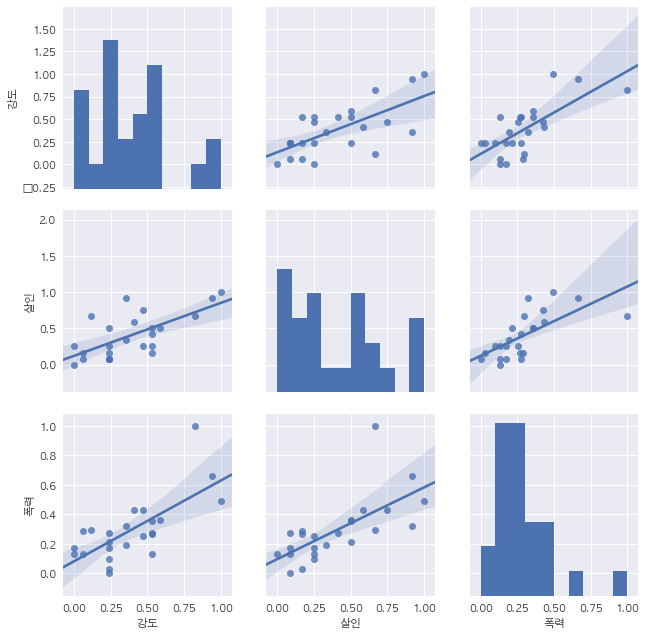

In [146]:
#'강도', '살인', '폭력' 간 상관관계
sns.pairplot(vc_arrest_rates_norm, vars = ['강도', '살인', '폭력'], kind = 'reg', size = 3)
plt.show()

범죄 유형 간 양의 상관관계 확인

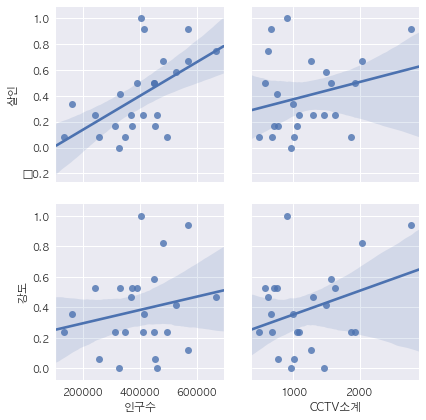

In [147]:
sns.pairplot(vc_arrest_rates_norm, x_vars = ['인구수', 'CCTV소계'],
            y_vars = ['살인', '강도'], kind = 'reg', size = 3)
plt.show()

CCTV 설치 수가 적은 경우 살인과 강도 수치가 이상적으로 높은 경우들이 있다.

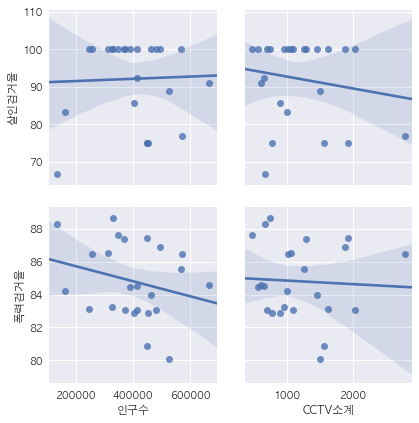

In [148]:
sns.pairplot(vc_arrest_rates_norm,
            x_vars = ['인구수', 'CCTV소계'],
            y_vars = ['살인검거율', '폭력검거율'], kind = 'reg', size = 3)
plt.show()

### Heatmap
- '총 검거' 의 표준화 후 heatmap 작성

In [149]:
tmp_max = vc_arrest_rates_norm['총 검거'].max()
vc_arrest_rates_norm_copy = vc_arrest_rates_norm.copy()
vc_arrest_rates_norm_copy['총 검거'] = vc_arrest_rates_norm_copy['총 검거'] / tmp_max * 100
vc_arrest_rates_norm_sort = vc_arrest_rates_norm_copy.sort_values(by = '총 검거', ascending = False)

In [151]:
#'총 검거'를 기준으로 내림차준 정렬
vc_arrest_rates_norm_sort.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV소계,총 검거,총 범죄
구별,,,,,,,,,,,,,,
도봉구,0.000000,0.235294,0.083333,0.000000,0.000000,100.000000,100.0,100.0,44.967074,87.626093,348646.0,485,100.000000,0.318627
금천구,0.141210,0.058824,0.083333,0.172426,0.134074,80.794702,100.0,100.0,56.668794,86.465433,255082.0,1015,97.997139,0.589867
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.0,100.0,42.200925,83.047619,372164.0,707,96.375820,2.034438
동대문구,0.204611,0.470588,0.250000,0.314061,0.250887,84.393064,100.0,100.0,41.090358,87.401884,369496.0,1294,95.444250,1.490147
용산구,0.265130,0.529412,0.250000,0.169004,0.133128,89.175258,100.0,100.0,37.700706,83.121951,244203.0,1624,94.776790,1.346674


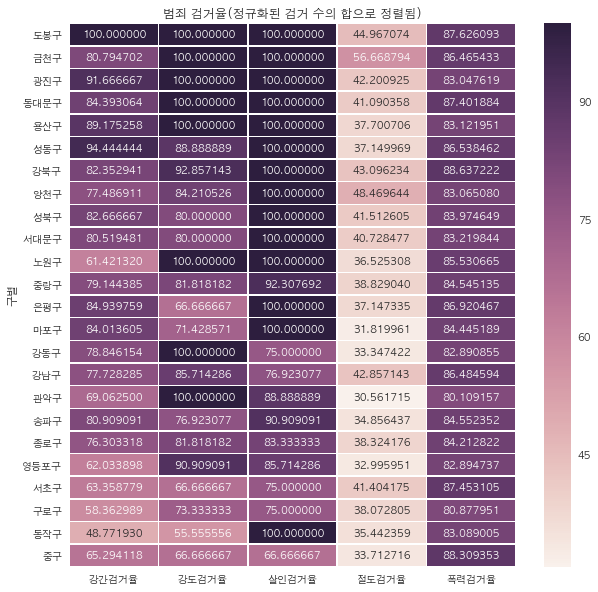

In [153]:
target_col = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']

plt.figure(figsize = (10, 10))
sns.heatmap(vc_arrest_rates_norm_sort[target_col], annot = True, fmt = 'f', linewidths = .5)
plt.title('범죄 검거율(정규화된 검거 수의 합으로 정렬됨)')
plt.show()

In [155]:
target_col = ['강간', '강도', '살인', '절도', '폭력', '총 범죄']

vc_arrest_rates_norm_copy['총 범죄'] = vc_arrest_rates_norm_copy['총 범죄'] / 5
vc_arrest_rates_norm_sort = vc_arrest_rates_norm_copy.sort_values(by = '총 범죄', ascending = False)

In [156]:
vc_arrest_rates_norm_sort.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV소계,총 검거,총 범죄
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,85.463066,0.894540
양천구,0.806916,0.823529,0.666667,1.000000,1.000000,77.486911,84.210526,100.000000,48.469644,83.065080,479978.0,2034,90.901149,0.859423
영등포구,0.556196,1.000000,1.000000,0.650359,0.493024,62.033898,90.909091,85.714286,32.995951,82.894737,402985.0,904,81.958753,0.739916
송파구,0.340058,0.470588,0.750000,0.744441,0.427524,80.909091,76.923077,90.909091,34.856437,84.552352,667483.0,618,85.103066,0.546522
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,85.212224,0.522733


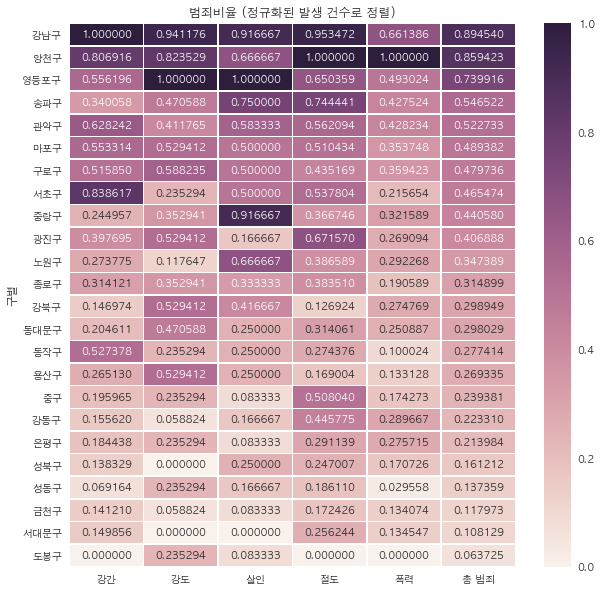

In [158]:
plt.figure(figsize = (10, 10))
sns.heatmap(vc_arrest_rates_norm_sort[target_col], annot = True, fmt = 'f', linewidth = .5)
plt.title('범죄비율 (정규화된 발생 건수로 정렬)')
plt.show()